In [1]:
import numpy as np
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

path = '/Users/jsha/gjai/nlp/pytest/'
file = 'income.csv'

df = pd.read_csv(path+file)
df.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,Female,40,Cuba,0


In [2]:
df.dtypes[df.dtypes == object].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O')], dtype=object)

In [3]:
df.columns.values

array(['age', 'workclass', 'education', 'educationNumber',
       'maritalStatus', 'occupation', 'relationship', 'race', 'gender',
       'hourPerWeek', 'nativeCountry', 'income'], dtype=object)

In [4]:
df.columns.to_list()

['age',
 'workclass',
 'education',
 'educationNumber',
 'maritalStatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'hourPerWeek',
 'nativeCountry',
 'income']

In [5]:
X = df.loc[:, 'age':'nativeCountry']
X.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,Male,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,Male,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,Male,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,Female,40,Cuba


In [6]:
y = df.loc[:, 'income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education        32561 non-null  object
 3   educationNumber  32561 non-null  int64 
 4   maritalStatus    32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  int64 
 8   gender           32561 non-null  object
 9   hourPerWeek      32561 non-null  int64 
 10  nativeCountry    32561 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [8]:
cat_list = X.select_dtypes(exclude=['int64']).columns.tolist()
int_list = X.select_dtypes(exclude=['object']).columns.tolist()

X_num = X[int_list]
X_cat = X[cat_list]

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
print(X_scaled)
print(type(X_scaled))



[[0.30136986 0.8        0.75       0.39795918]
 [0.45205479 0.8        0.75       0.12244898]
 [0.28767123 0.53333333 0.75       0.39795918]
 ...
 [0.56164384 0.53333333 0.75       0.39795918]
 [0.06849315 0.53333333 0.75       0.19387755]
 [0.47945205 0.53333333 0.75       0.39795918]]
<class 'numpy.ndarray'>


In [10]:
X_hot = pd.get_dummies(X_cat)
print(X_hot.columns.values)
print(type(X_hot))
X_hot.head()

['workclass_ ?' 'workclass_ Federal-gov' 'workclass_ Local-gov'
 'workclass_ Never-worked' 'workclass_ Private' 'workclass_ Self-emp-inc'
 'workclass_ Self-emp-not-inc' 'workclass_ State-gov'
 'workclass_ Without-pay' 'education_ 10th' 'education_ 11th'
 'education_ 12th' 'education_ 1st-4th' 'education_ 5th-6th'
 'education_ 7th-8th' 'education_ 9th' 'education_ Assoc-acdm'
 'education_ Assoc-voc' 'education_ Bachelors' 'education_ Doctorate'
 'education_ HS-grad' 'education_ Masters' 'education_ Preschool'
 'education_ Prof-school' 'education_ Some-college'
 'maritalStatus_ Divorced' 'maritalStatus_ Married-AF-spouse'
 'maritalStatus_ Married-civ-spouse'
 'maritalStatus_ Married-spouse-absent' 'maritalStatus_ Never-married'
 'maritalStatus_ Separated' 'maritalStatus_ Widowed' 'occupation_ ?'
 'occupation_ Adm-clerical' 'occupation_ Armed-Forces'
 'occupation_ Craft-repair' 'occupation_ Exec-managerial'
 'occupation_ Farming-fishing' 'occupation_ Handlers-cleaners'
 'occupation_ Machi

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(drop=True),
                    X_hot.reset_index(drop=True)], axis=1)
X_final.head()

,0,1,2,3,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,nativeCountry_ Portugal,nativeCountry_ Puerto-Rico,nativeCountry_ Scotland,nativeCountry_ South,nativeCountry_ Taiwan,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia
0,0.301370,0.800000,0.75,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.75,0.122449,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.75,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.50,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.50,0.397959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print('X.shape:', X_final.shape)
print('y.shape:', y.shape)

X.shape: (32561, 101)
y.shape: (32561,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                6528      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                   validation_data=(X_test, y_test))

Train on 24420 samples, validate on 8141 samples
Epoch 1/10
24420/24420 [==============================] - 3s 122us/step - loss: 0.3746 - acc: 0.8225 - val_loss: 0.3560 - val_acc: 0.8366
Epoch 2/10
24420/24420 [==============================] - 3s 142us/step - loss: 0.3543 - acc: 0.8332 - val_loss: 0.3514 - val_acc: 0.8369
Epoch 3/10
24420/24420 [==============================] - 2s 92us/step - loss: 0.3511 - acc: 0.8353 - val_loss: 0.3513 - val_acc: 0.8393
Epoch 4/10
24420/24420 [==============================] - 2s 96us/step - loss: 0.3498 - acc: 0.8359 - val_loss: 0.3496 - val_acc: 0.8386
Epoch 5/10
24420/24420 [==============================] - 3s 112us/step - loss: 0.3485 - acc: 0.8376 - val_loss: 0.3510 - val_acc: 0.8396
Epoch 6/10
24420/24420 [==============================] - 3s 109us/step - loss: 0.3467 - acc: 0.8388 - val_loss: 0.3512 - val_acc: 0.8368
Epoch 7/10
24420/24420 [==============================] - 2s 93us/step - loss: 0.3454 - acc: 0.8403 - val_loss: 0.3511 - val_

In [17]:
import os 

path = '/Users/jsha/gjai/nlp/pytest/14_연습문제/'
model_name = '14_추천모델.h5'
mms_name = 'minmaxscaler.pickle'

if os.path.exists(path):
    print("{} -- Folder already exists\n".format(path))
else:
    os.makedirs(path, exist_ok=True)
    print("{} -- Folder created\n".format(path))

model.save(path+model_name)

import pickle

with open(path+mms_name, 'wb') as file:
    pickle.dump(scaler, file, protocol=pickle.HIGHEST_PROTOCOL)

/Users/jsha/gjai/nlp/pytest/14_연습문제/ -- Folder already exists



In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(acc)+1)

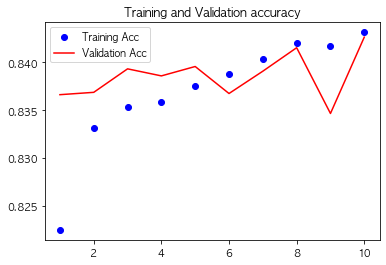

In [20]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

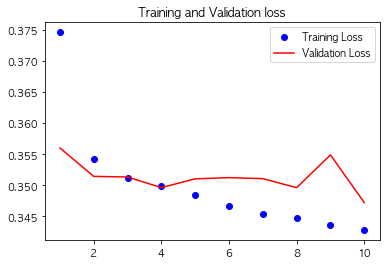

In [21]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 테스트 데이터 전처리
- 중요한 점은, get_dummies를 사용할 때, 이전 training 데이터와 결합해서 사용한다.
- 왜? 테스트 데이터가 너무 작아서 이대로 get_dummies를 사용하면 확장되는 컬럼수가 달라진다. 나중에 모델에 넣을 수가 없어.

In [23]:
import pandas as pd

path = '/Users/jsha/gjai/nlp/pytest/'
df = pd.read_csv(path+'income.csv')
df_X = df.loc[:, 'age':'nativeCountry']
print('df_X.shape:', df_X.shape)

new_df = pd.read_csv(path+'income_test.csv')
new_df_X = new_df.loc[:, 'age':'nativeCountry']
print('new_df_X.shape:', new_df_X.shape)


df_X.shape: (32561, 11)
new_df_X.shape: (10, 11)


In [24]:
df_appended = new_df_X.append(df_X)
print('df_appended.shape:', df_appended.shape)

df_appended.shape: (32571, 11)


In [25]:
df_appended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32571 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32571 non-null  int64 
 1   workclass        32571 non-null  object
 2   education        32571 non-null  object
 3   educationNumber  32571 non-null  int64 
 4   maritalStatus    32571 non-null  object
 5   occupation       32571 non-null  object
 6   relationship     32571 non-null  object
 7   race             32571 non-null  int64 
 8   gender           32571 non-null  object
 9   hourPerWeek      32571 non-null  int64 
 10  nativeCountry    32571 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.0+ MB


In [26]:
X_num = df_appended.select_dtypes(include=['int64'])
X_cat = df_appended.select_dtypes(include=['object'])
print(X_num.shape)
print(X_cat.shape)

(32571, 4)
(32571, 7)


In [27]:
X_scaled = scaler.transform(X_num)
print(X_scaled.shape)
print(X_scaled[0])

(32571, 4)
[0.2739726 0.6       0.75      0.3877551]


In [28]:
X_hot = pd.get_dummies(X_cat)
print(X_hot.shape)

(32571, 97)


In [29]:
X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(drop=True), X_hot.reset_index(drop=True)], axis=1)
print(X_final.shape)

(32571, 101)


In [30]:
X_only_new = X_final.iloc[:len(new_df), ]
X_only_new.shape

(10, 101)

In [31]:
predictions = model.predict(X_only_new)
print('Result:', predictions)

Result: [[0.03273654]
 [0.00207368]
 [0.2515434 ]
 [0.03064194]
 [0.16467813]
 [0.0014942 ]
 [0.00575393]
 [0.08190474]
 [0.04217426]
 [0.06515942]]


In [32]:
result = []
for i, prediction in enumerate(predictions):
    if prediction > 0.1: # 현재 결과는 0.5 이상인 것이 없어서 기준을 낮게 잡음
        result.append(str(i)+" above 50K") 
    else:
        result.append(str(i)+" below 50K")
result

['0 below 50K',
 '1 below 50K',
 '2 above 50K',
 '3 below 50K',
 '4 above 50K',
 '5 below 50K',
 '6 below 50K',
 '7 below 50K',
 '8 below 50K',
 '9 below 50K']